In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/insurance/insurance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [3]:
df=pd.read_csv("/kaggle/input/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
palette= sns.color_palette("viridis", as_cmap=True)
df.describe().style.background_gradient(cmap=palette)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print('*****' * 10)

sex
male      676
female    662
Name: count, dtype: int64
**************************************************
smoker
no     1064
yes     274
Name: count, dtype: int64
**************************************************
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
**************************************************


In [9]:
df.duplicated().sum()

1

In [10]:
df=df.drop_duplicates()
df.shape

(1337, 7)

In [11]:
numerical_features = ["age", "bmi", "children", "charges"]
categorical_features =['sex' , 'region' ,'smoker']

Text(0.5, 1.0, 'Gender Distribution')

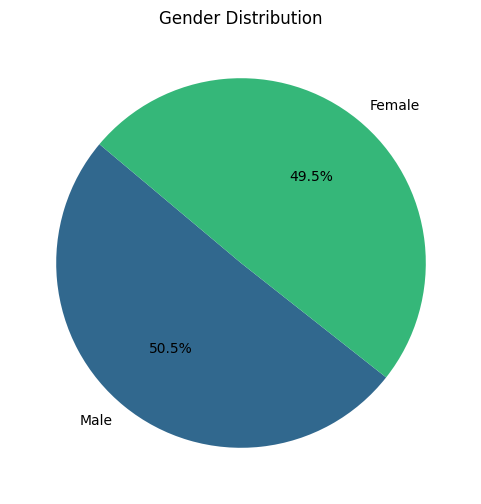

In [12]:
gender_counts=df['sex'].value_counts ()
palette = sns.color_palette("viridis", n_colors=len(gender_counts))
labels = ['Male', 'Female']
fig, ax1 = plt.subplots(1, figsize=(14, 6))
ax1.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Gender Distribution')

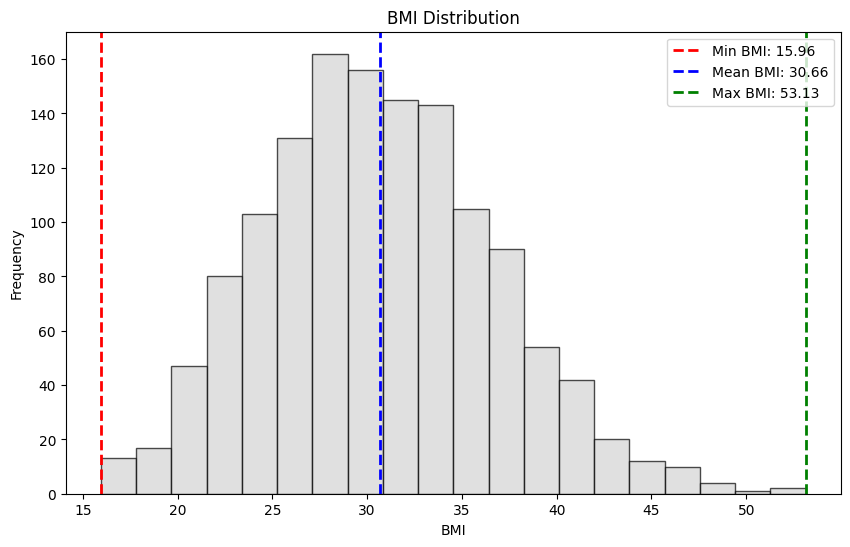

In [13]:
bmi_stats = df['bmi'].describe()
min_bmi = bmi_stats['min']
mean_bmi = bmi_stats['mean']
max_bmi = bmi_stats['max']

# Plotting the histogram of the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['bmi'], bins=20, color='lightgray', edgecolor='black', alpha=0.7)
plt.axvline(min_bmi, color='red', linestyle='dashed', linewidth=2, label=f'Min BMI: {min_bmi:.2f}')
plt.axvline(mean_bmi, color='blue', linestyle='dashed', linewidth=2, label=f'Mean BMI: {mean_bmi:.2f}')
plt.axvline(max_bmi, color='green', linestyle='dashed', linewidth=2, label=f'Max BMI: {max_bmi:.2f}')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()


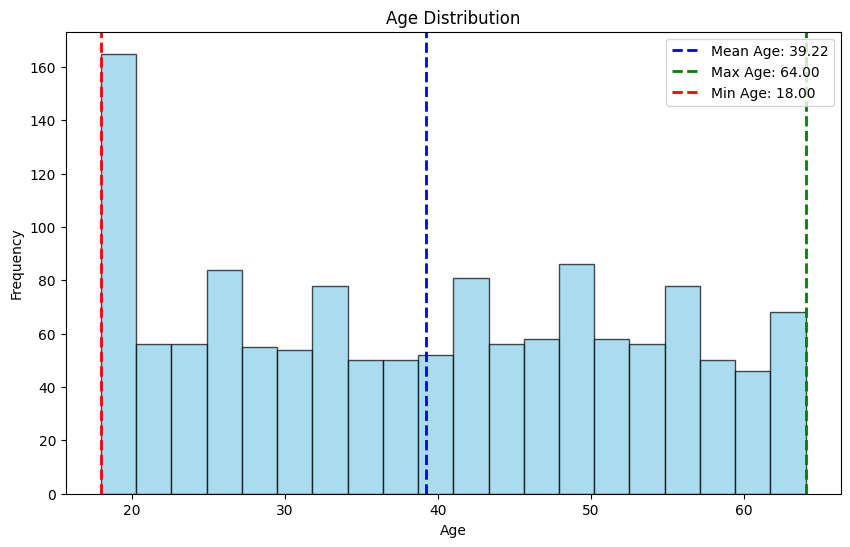

In [14]:
age_stats = df['age'].describe()
min_age = age_stats['min']
mean_age = age_stats['mean']
max_age = age_stats['max']

# Plotting the histogram of the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
# Adding vertical lines for mean, max, and min ages
plt.axvline(mean_age, color='blue', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')
plt.axvline(max_age, color='green', linestyle='dashed', linewidth=2, label=f'Max Age: {max_age:.2f}')
plt.axvline(min_age, color='red', linestyle='dashed', linewidth=2, label=f'Min Age: {min_age:.2f}')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

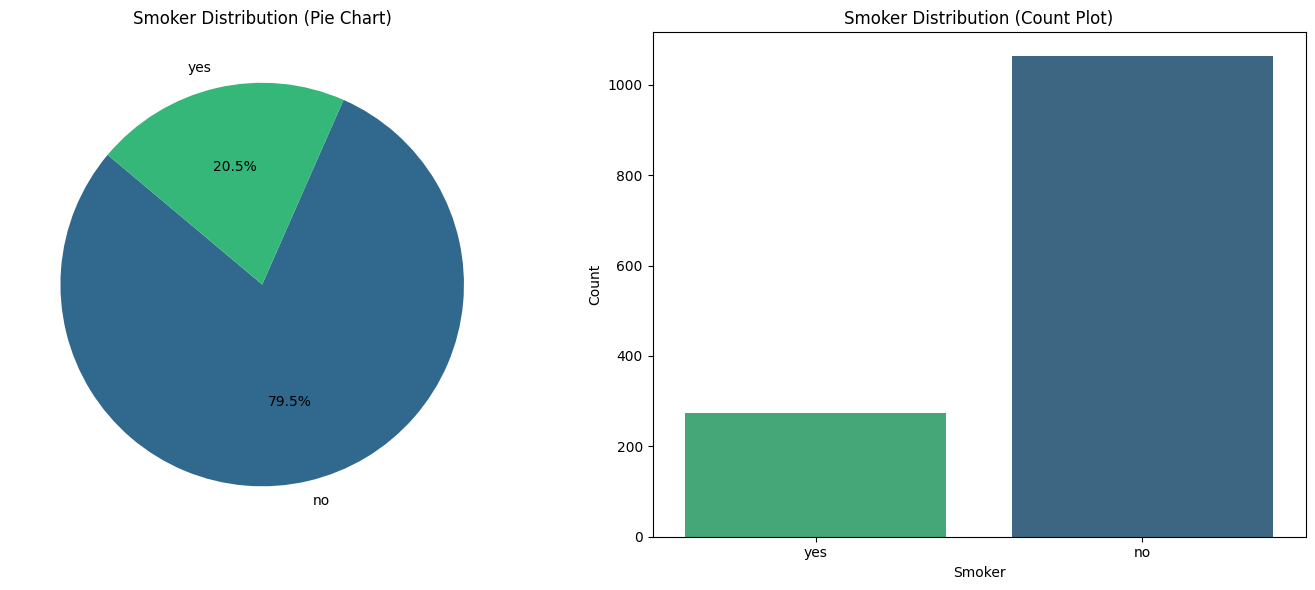

In [15]:
somker_counts = df['smoker'].value_counts().sort_index()

palette = sns.color_palette("viridis", n_colors=len(somker_counts))
labels = ['no', 'yes']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(somker_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Smoker Distribution (Pie Chart)')
sns.countplot(x='smoker', data=df, ax=ax2, palette=palette[::-1])
ax2.set_title('Smoker Distribution (Count Plot)')
ax2.set_xlabel('Smoker')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

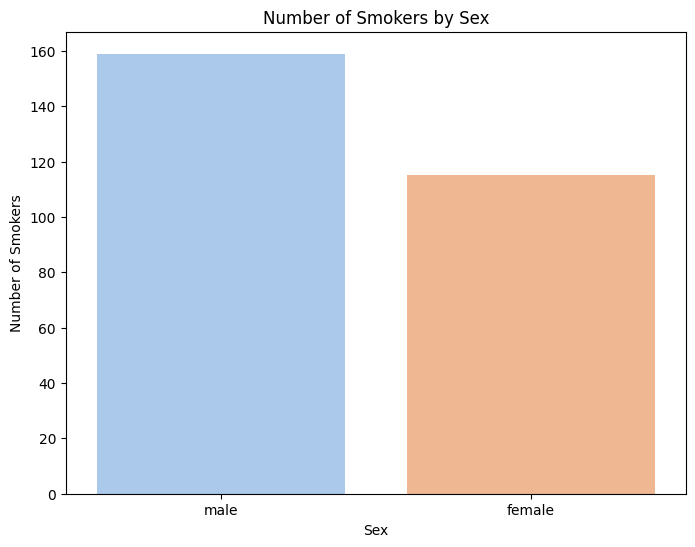

In [16]:
smokers_by_sex = df['sex'][df['smoker'] == "yes"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=smokers_by_sex.index, y=smokers_by_sex.values, palette='pastel')
plt.title('Number of Smokers by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Smokers')
plt.show()


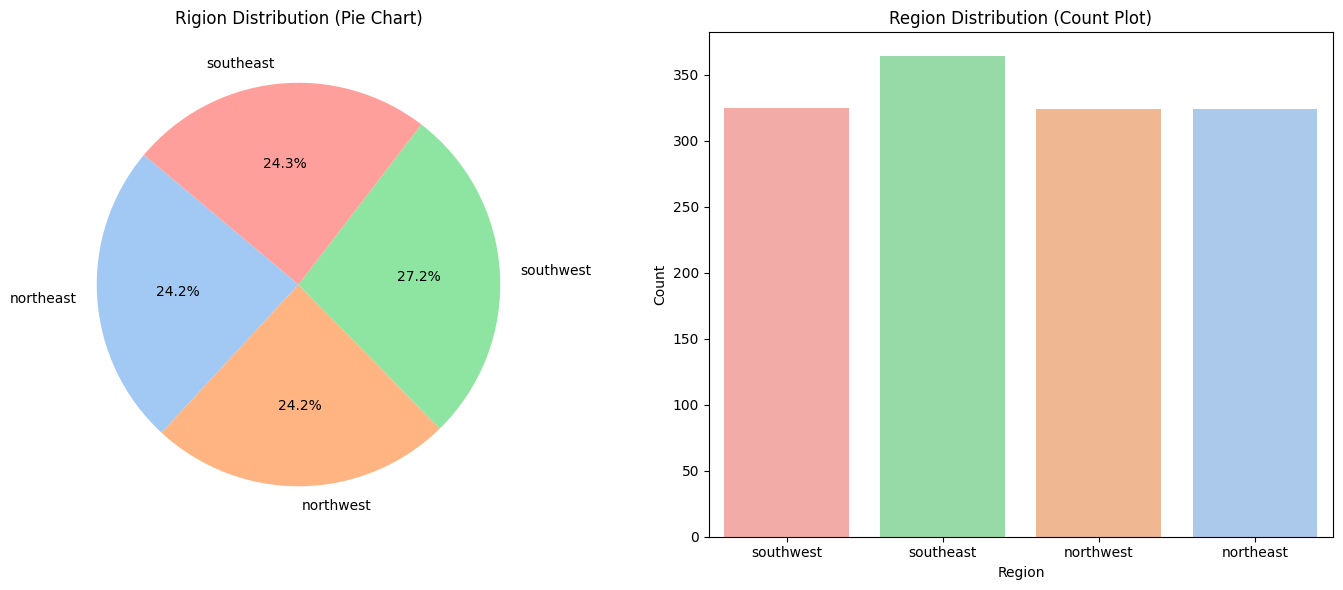

In [17]:
region_counts = df['region'].value_counts().sort_index()

palette = sns.color_palette("pastel", n_colors=len(region_counts))
labels = ['northeast', 'northwest', 'southwest', 'southeast']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(region_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Rigion Distribution (Pie Chart)')
sns.countplot(x='region', data=df, ax=ax2, palette=palette[::-1])
ax2.set_title('Region Distribution (Count Plot)')
ax2.set_xlabel('Region')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

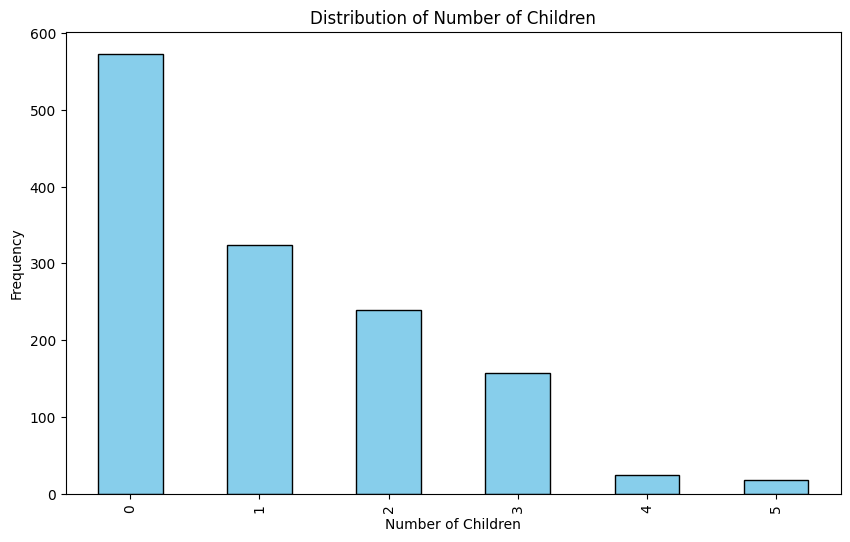

In [18]:
children_counts = df['children'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
children_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


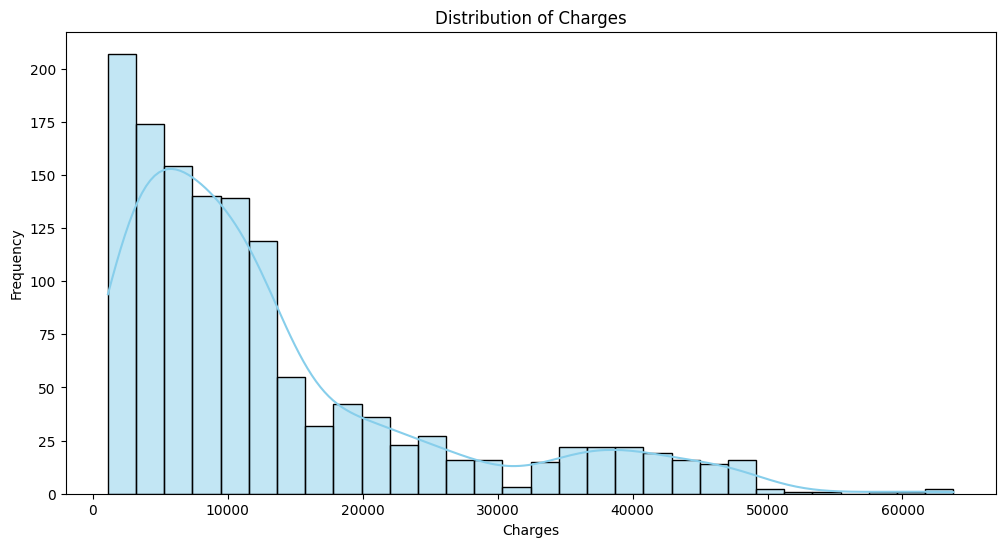

In [19]:
charges_counts = df['charges'].value_counts()
plt.figure(figsize=(12, 6))
sns.histplot(df['charges'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()



In [20]:
df['charges'] = np.log10(df['charges'])


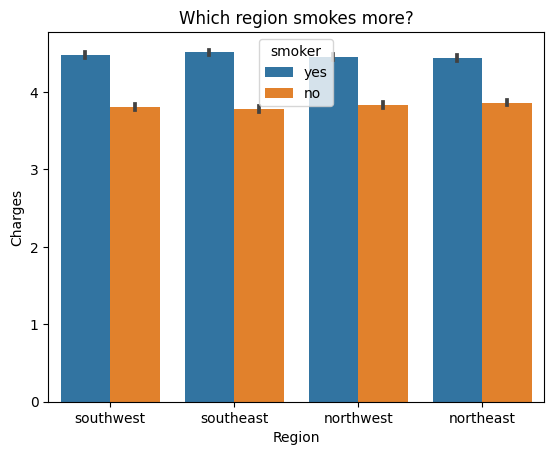

In [21]:
smoker_counts_by_region = df.groupby('region')['smoker'].value_counts()

sns.barplot(x='region', y='charges', data=df, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Which region smokes more?")
plt.show()

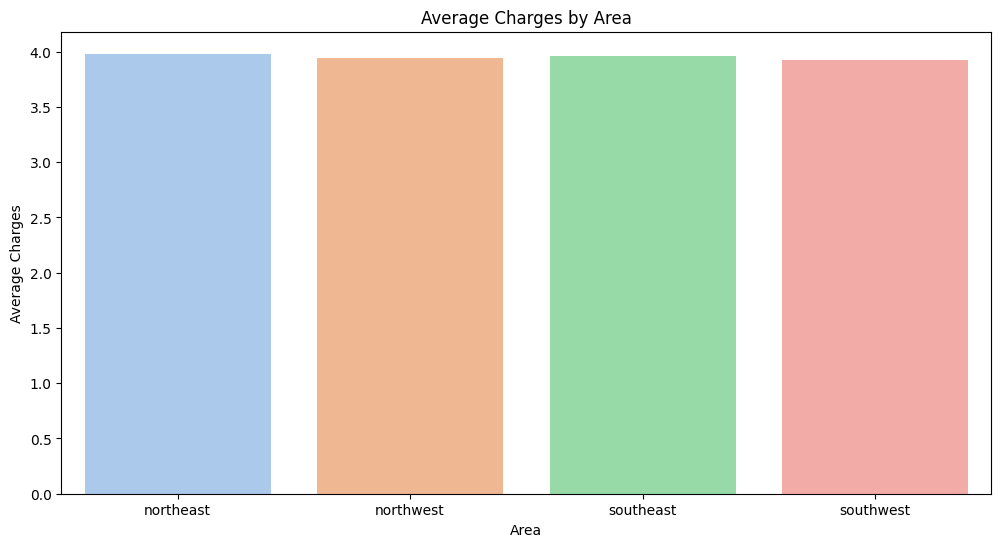

In [22]:
average_charges_by_area = df.groupby('region')['charges'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='charges', data=average_charges_by_area, palette='pastel')

plt.title('Average Charges by Area')
plt.xlabel('Area')
plt.ylabel('Average Charges')
plt.show()


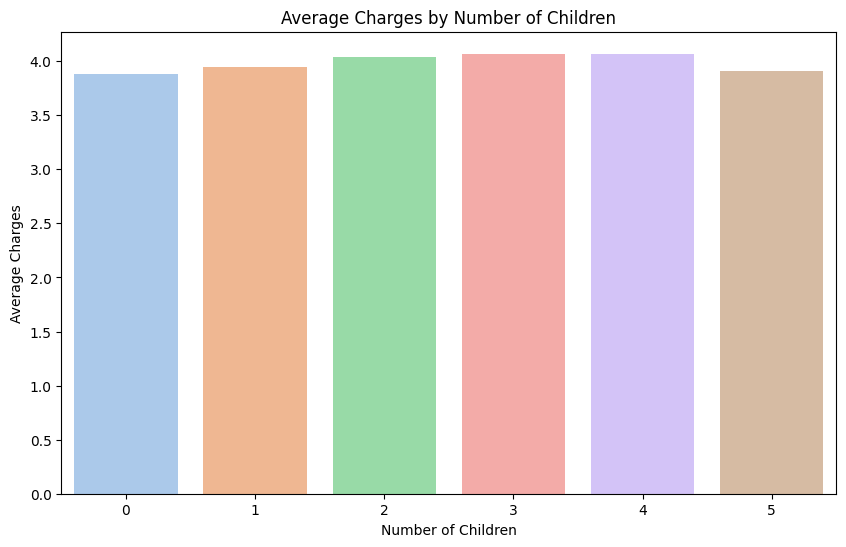

In [23]:
average_charges_by_children = df.groupby('children')['charges'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', data=average_charges_by_children, palette='pastel')
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

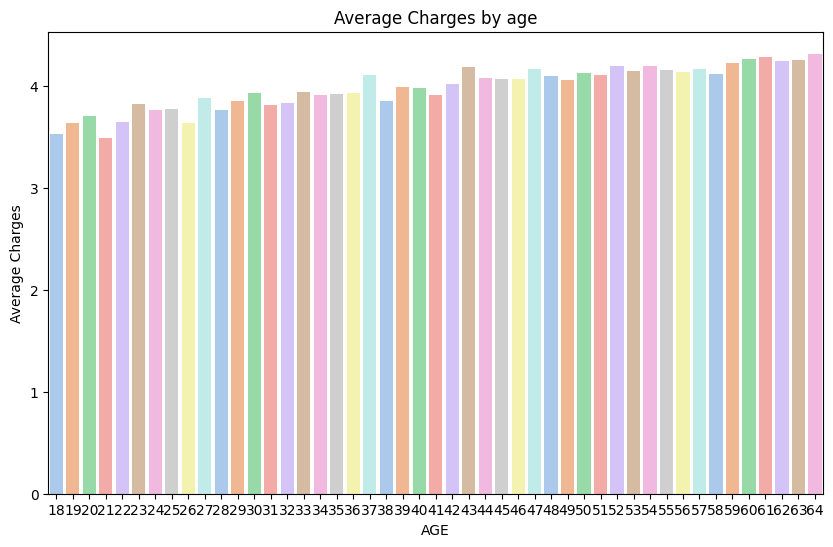

In [24]:
average_charges_by_children = df.groupby('age')['charges'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='charges', data=average_charges_by_children, palette='pastel')
plt.title('Average Charges by age')
plt.xlabel('AGE')
plt.ylabel('Average Charges')
plt.show()

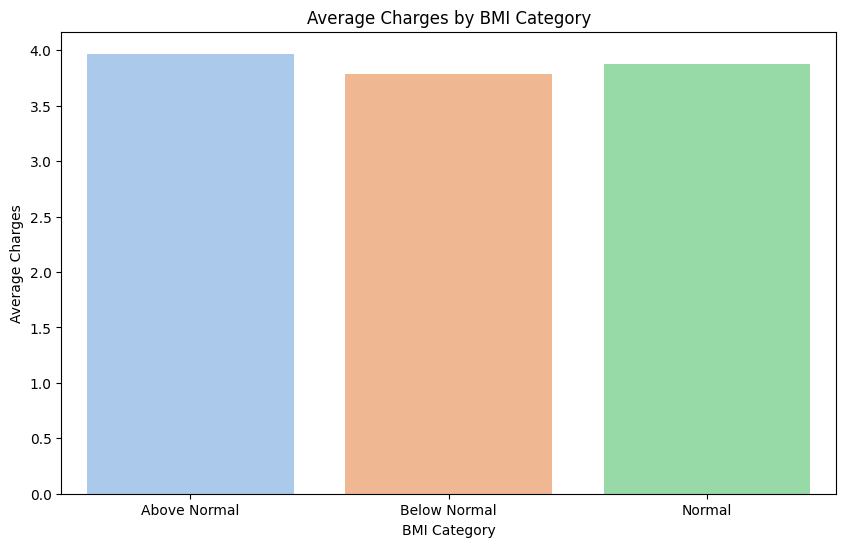

In [25]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Below Normal'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    else:
        return 'Above Normal'
df['bmi_category'] = df['bmi'].apply(categorize_bmi)

average_charges_by_bmi_category = df.groupby('bmi_category')['charges'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='bmi_category', y='charges', data=average_charges_by_bmi_category, palette='pastel')

plt.title('Average Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.show()
# Remove the 'bmi_category' column to revert to the original state
df.drop(columns='bmi_category', inplace=True)

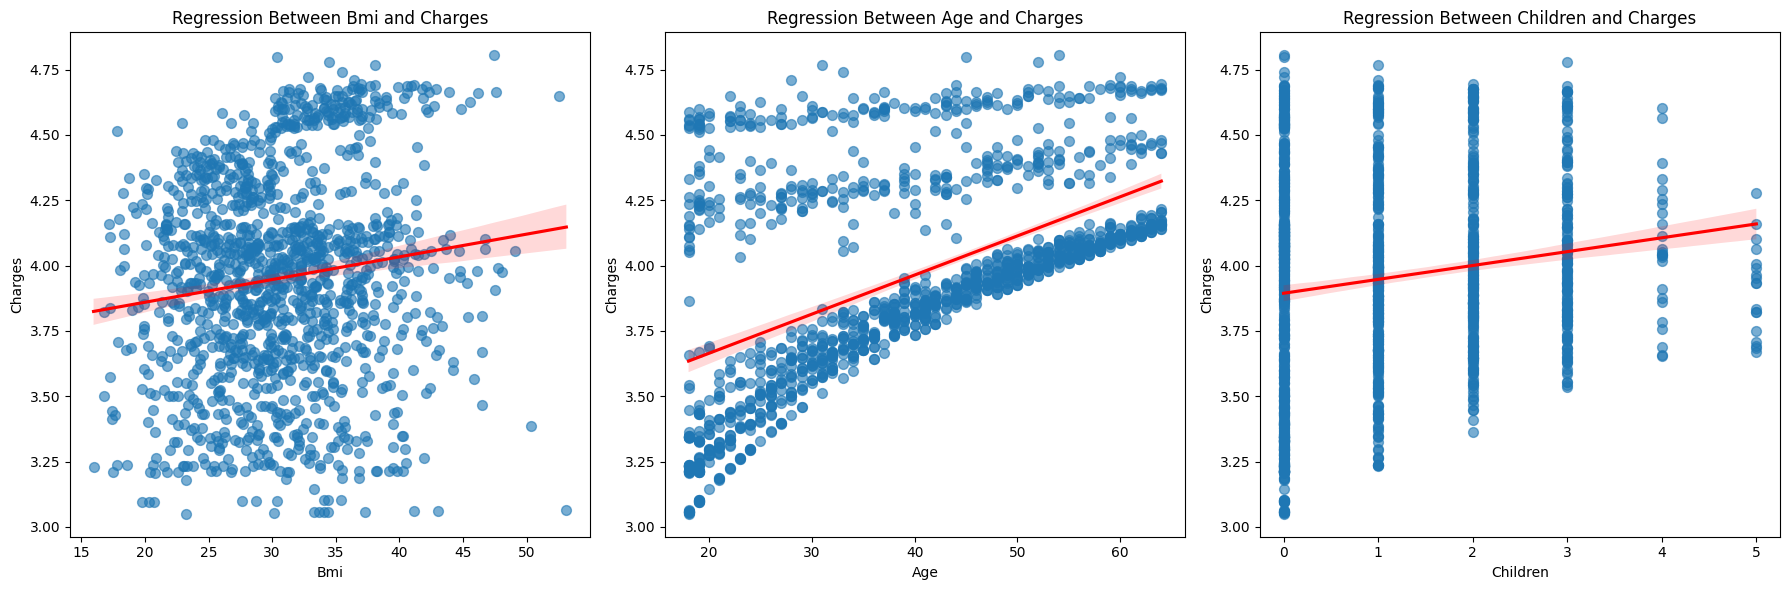

In [26]:
variables = ['bmi', 'age', 'children' ]
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(18, 6))

for ax, var in zip(axes, variables):
    sns.regplot(x=var, y='charges', data=df, ax=ax, scatter_kws={'s':50, 'alpha':0.6}, line_kws={'color':'red'})
    ax.set_title(f'Regression Between {var.capitalize()} and Charges')
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel('Charges')

plt.tight_layout()
plt.show()


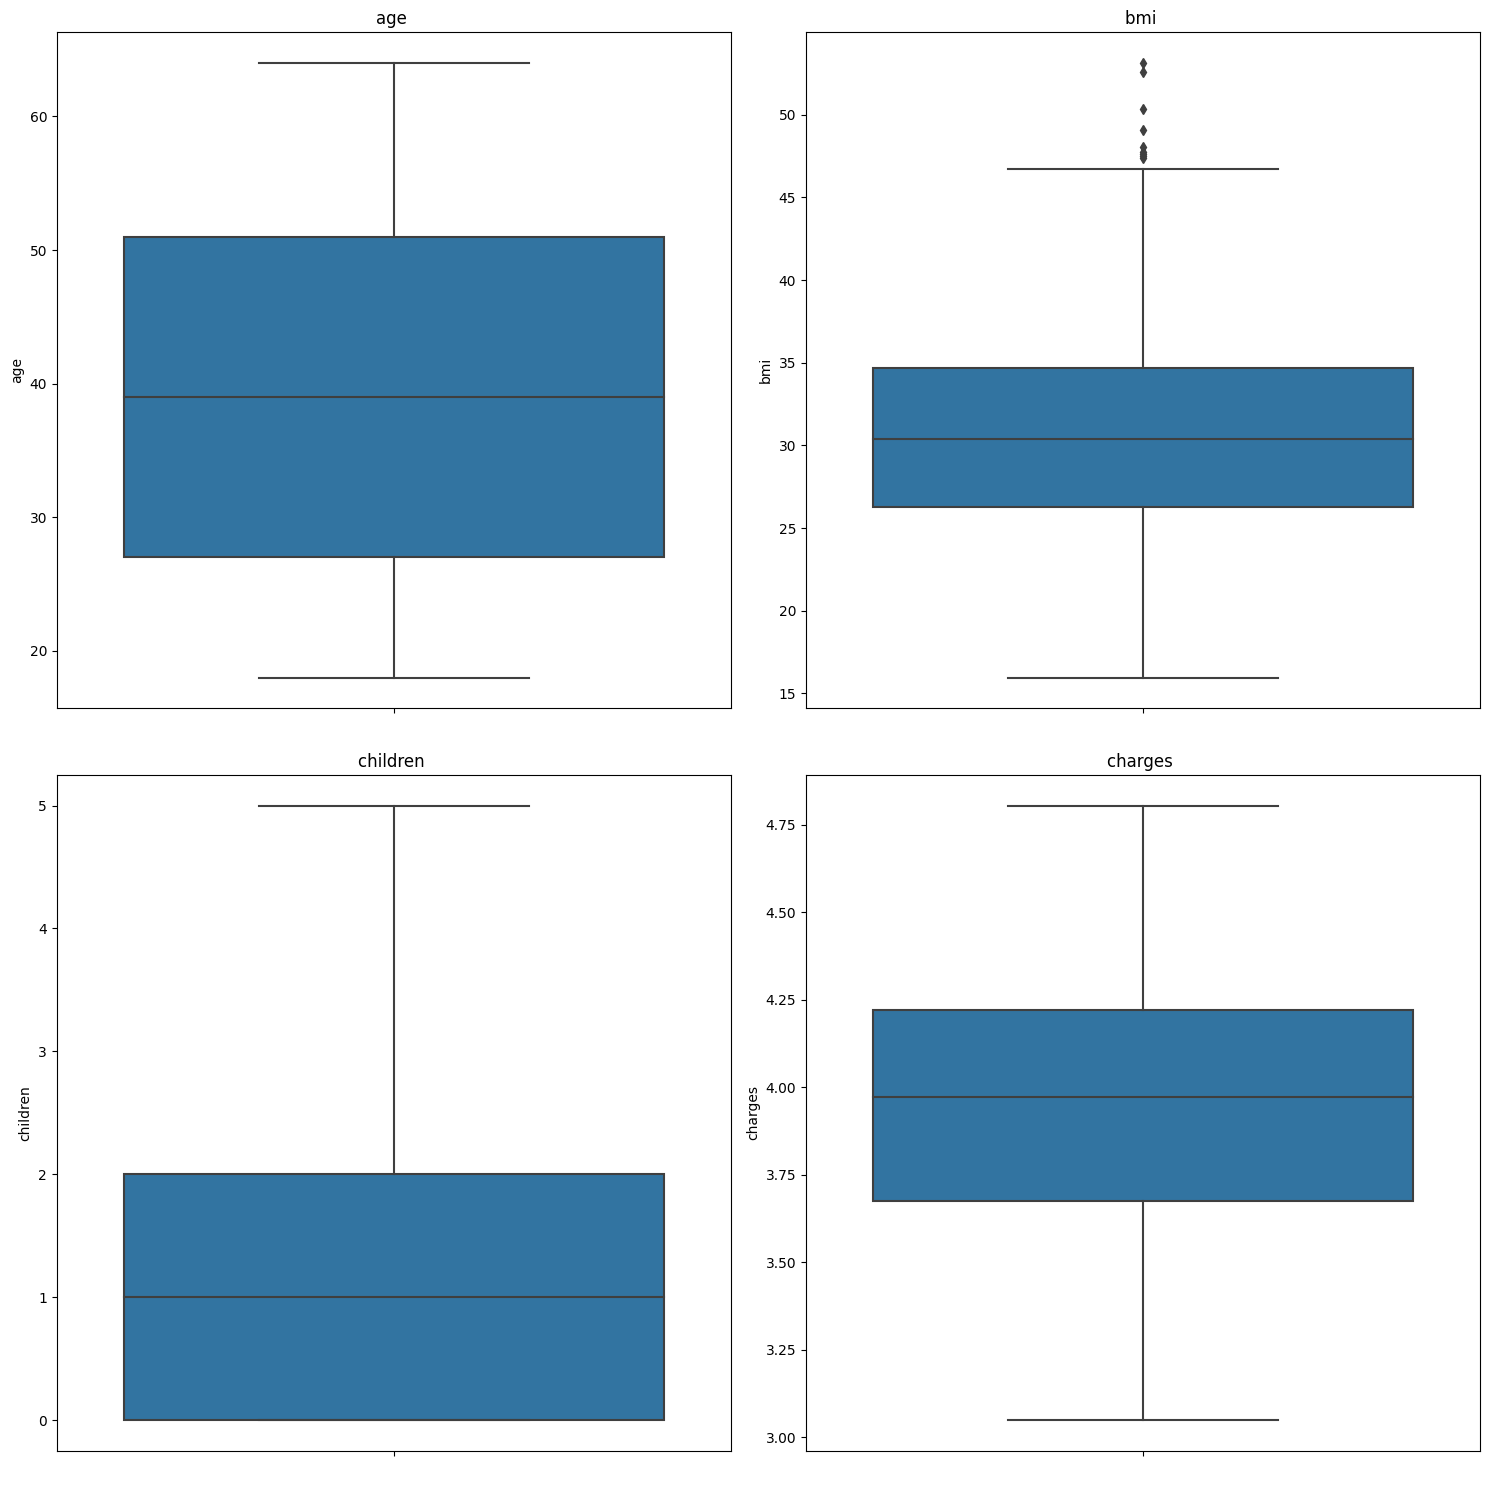

In [27]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, y=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

In [28]:
label_encoder = LabelEncoder()
for column in categorical_features :
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,4.227499
1,18,1,33.770,1,0,2,3.236928
2,28,1,33.000,3,0,2,3.648308
3,33,1,22.705,0,0,1,4.342116
4,32,1,28.880,0,0,1,3.587358


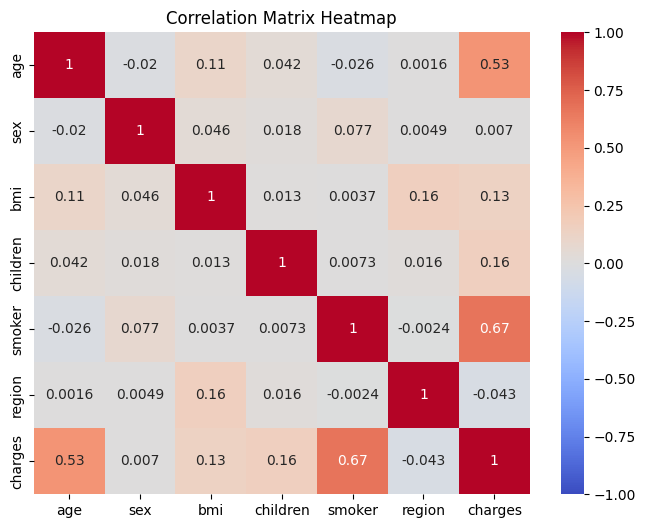

In [29]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
X = df.drop(columns=['charges' ,'sex'], axis=1)
Y = df['charges']

polynomial_features = PolynomialFeatures(degree=2)
X= polynomial_features.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

R2= :  0.8830330492044851
MSE= : 0.020476891258138338
MAE= : 0.08355641783065483


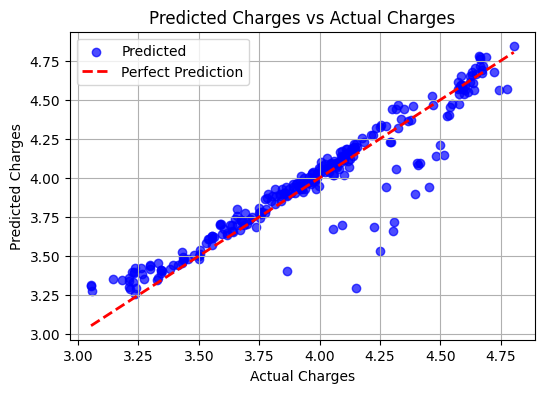

In [32]:
#test_data_prediction
y_predict= model.predict(X_test)

r2 = r2_score(Y_test, y_predict)
print ("R2= : " , r2)

mse = mean_squared_error(Y_test, y_predict)
print ("MSE= :" , mse)

mae = mean_absolute_error(Y_test, y_predict)
print ("MAE= :" , mae)

plt.figure(figsize=(6, 4))
plt.scatter(Y_test,y_predict , color='blue', alpha=0.7, label='Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Predicted Charges vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()


R2= : 0.8243765590935702
MSA= :  0.027220856442380183
MAE= :  0.09156590715263843


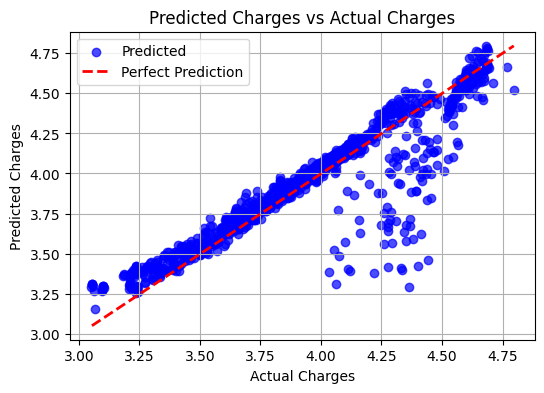

In [33]:
#train_data_prediction
x_predict = model.predict(X_train)

r2 = r2_score(Y_train,x_predict)
print ('R2= :' , r2)

mse = mean_squared_error(Y_train, x_predict)
print ('MSA= : ' , mse)

mae = mean_absolute_error(Y_train , x_predict)
print('MAE= : ' , mae)

plt.figure(figsize=(6, 4))
plt.scatter(Y_train, x_predict, color='blue', alpha=0.7, label='Predicted')
plt.plot([Y_test.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Predicted Charges vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()